In [3]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
import numpy as np
import random as rng

USE_THREADS = False

def get_segmented_objects(mask, min_size=100):
    # Threshold the mask to obtain a binary image
    imgSplit = cv2.split(mask)
    flag,b = cv2.threshold(imgSplit[2],0,255,cv2.THRESH_OTSU) 
    #4.Erodes the Thresholded Image
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    canny_out = cv2.erode(b,element)
    contours, hierarchy = cv2.findContours(canny_out, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    drawing = np.zeros((canny_out.shape[0],canny_out.shape[1],3),dtype = np.uint8)
    bounding_boxes = []
    for i in range(len(contours)):
        color = (rng.randint(0,255),rng.randint(0,255),rng.randint(0,255))
        cv2.drawContours(drawing,contours,i,color,2,cv2.LINE_8,hierarchy,0)
        x, y, w, h = cv2.boundingRect(contours[i])
        if w * h >= min_size:
                bounding_boxes.append((x + w/2, y + h/2, w, h))
    contained_boxes = []
    for bounding_box in bounding_boxes:
        for another_box in bounding_boxes:
            if another_box!=bounding_box:
                if(bounding_box[0]>=another_box[0]) and bounding_box[0]+bounding_box[2]<= another_box[0]+another_box[2] and (bounding_box[1]>=another_box[1]) and bounding_box[1]+bounding_box[3]<= another_box[1]+another_box[3]:
                    print("contained")
                    contained_boxes.append(bounding_box)
    refined_boxes = [box for box in bounding_boxes if box not in contained_boxes]
    return refined_boxes



    # # Draw separate contours for each connected component
    # bounding_boxes = []
    # for label in range(1, num_labels):
    #     # Create a mask for the current label
    #     label_mask = (labels == label).astype('uint8') * 255

    #     # Generate contours from the label mask
    #     contours, hierarchy = cv2.findContours(label_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #     contours, _ = cv2.findContours(label_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #     boarder = False
    #     for contour in contours:
    #         x, y, w, h = cv2.boundingRect(contour)
    #         # if(x<=10 or x+w>=1023) or (y<=10 or y+h>=1023):
    #         #     boarder = True
    #         if w * h >= min_size:
    #             bounding_boxes.append((x + w/2, y + h/2, w, h))
    
    # return bounding_boxes

def process_image(image_path, mask_path, vis=False):
    image_name = os.path.basename(image_path)
    mask = cv2.imread(mask_path)
        
    bounding_boxes = get_segmented_objects(mask)
    format = "cx_cy_w_h"
    boxes = []
    data = []
    
    for bbox in bounding_boxes:
        center_x, center_y, width, height = bbox
        boxes.append([center_x,center_y,width,height])
    if bounding_boxes:
        data.append({
                'Image Name': image_name,
                'Image Path': image_path,
                'bbox_coord':boxes,
                'num_patch': len(bounding_boxes),
                'bbox_format':format,
        })
    else:
        data.append({
                'Image Name': image_name,
                'Image Path': image_path,
                'bbox_coord':[],
                'num_patch': 0,
                'bbox_format':format,
        })

    
    if vis:
        if bounding_boxes:
            empty = np.zeros([1024, 1024])
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
            ax1.imshow(empty)
            ax1.set_title('Image')
            ax1.axis('off')
            
            ax2.imshow(mask, cmap='gray')
            ax2.set_title('Mask')
            ax2.axis('off')
            
            for bbox in bounding_boxes:
                center_x, center_y, width, height = bbox
                x = center_x - width/2
                y = center_y - height/2
                rect = plt.Rectangle((x, y), width, height, fill=False, edgecolor='g')
                ax1.add_patch(rect)
        
            plt.show()
    
    return data

def process_images(root_folder,dataframe, vis=False):
    data = []
    csv_data = pd.read_csv(dataframe)
    image_files = csv_data["Image_path"].to_list()
    if USE_THREADS:
        print("threads are starting")
        with ThreadPoolExecutor() as executor:
            results = []
            
            for image_file in image_files:
                image_path = os.path.join(root_folder,"train_patch_image",image_file)
                mask_path = os.path.join(root_folder,"train_patch_mask",image_file.replace("_image.jpg","_mask.jpg"))
                
                if not os.path.exists(mask_path):
                    continue
                
                result = executor.submit(process_image, image_path, mask_path, vis)
                results.append(result)
            
            for result in results:
                data.extend(result.result())
    else:
        results = []
        for image_file in image_files:
                image_path = os.path.join(root_folder,"train_patch_image",image_file)
                mask_path = os.path.join(root_folder,"train_patch_mask",image_file.replace("_image.jpg","_mask.jpg"))
                
                if not os.path.exists(mask_path):
                    continue
                
                result = process_image(image_path,mask_path,vis)
                results.append(result)
            
        for result in results:
            data.extend(result)

    
    df = pd.DataFrame(data)
    df.to_csv('segmentation_data.csv', index=False)
    print('Segmentation data saved to segmentation_data.csv')

# Provide the folder path containing the images and masks
dataframe = '/home/humanoid/internalHD/WORKS_HD/dataloaders/data_preprocess/hubmap_kidney/train_df.csv'
root_folder = "/home/humanoid/datasets/Hubmap-kidney"
process_images(root_folder,dataframe, vis=False)


contained
contained
contained
Segmentation data saved to segmentation_data.csv


In [4]:
print(result)

NameError: name 'result' is not defined

In [5]:
pd.read_csv(folder_path)["Image_path"].to_list()

NameError: name 'folder_path' is not defined

In [6]:
image = cv2.imread('/home/humanoid/internalHD/datasets/kidney_patch/train/0486052bb_001_017_image.jpg')

[ WARN:0@8348.820] global loadsave.cpp:244 findDecoder imread_('/home/humanoid/internalHD/datasets/kidney_patch/train/0486052bb_001_017_image.jpg'): can't open/read file: check file path/integrity


In [10]:
df = pd.read_csv("segmentation_data.csv")

In [11]:
df

Image Name  \
0     26dc41664_000_000_image.jpg   
1     26dc41664_000_001_image.jpg   
2     26dc41664_000_002_image.jpg   
3     26dc41664_000_003_image.jpg   
4     26dc41664_000_004_image.jpg   
...                           ...   
6689  2f6ecfcdf_009_012_image.jpg   
6690  2f6ecfcdf_013_011_image.jpg   
6691  2f6ecfcdf_012_011_image.jpg   
6692  2f6ecfcdf_016_011_image.jpg   
6693  2f6ecfcdf_013_010_image.jpg   

                                             Image Path  \
0     /home/humanoid/datasets/Hubmap-kidney/train_pa...   
1     /home/humanoid/datasets/Hubmap-kidney/train_pa...   
2     /home/humanoid/datasets/Hubmap-kidney/train_pa...   
3     /home/humanoid/datasets/Hubmap-kidney/train_pa...   
4     /home/humanoid/datasets/Hubmap-kidney/train_pa...   
...                                                 ...   
6689  /home/humanoid/datasets/Hubmap-kidney/train_pa...   
6690  /home/humanoid/datasets/Hubmap-kidney/train_pa...   
6691  /home/humanoid/datasets/Hubmap-kidney/train_pa...   
6692  /home/humanoid/datasets/Hubmap-kidney/train_pa...   
6693  /home/humanoid/datasets/Hubmap-kidney/train_pa...   

                                             bbox_coord  num_patch bbox_format  
0                                                    []          0   cx_cy_w_h  
1                                                    []          0   cx_cy_w_h  
2                                                    []          0   cx_cy_w_h  
3                                                    []          0   cx_cy_w_h  
4                                                    []          0   cx_cy_w_h  
...                                                 ...        ...         ...  
6689  [[92.0, 253.5, 20, 5], [159.0, 246.0, 34, 20],...          8   cx_cy_w_h  
6690  [[239.5, 247.5, 33, 17], [155.5, 246.5, 21, 19...          7   cx_cy_w_h  
6691  [[185.5, 238.0, 33, 34], [49.0, 228.5, 42, 37]...          5   cx_cy_w_h  
6692  [[102.0, 243.0, 26, 26], [99.5, 219.0, 23, 20]...          6   cx_cy_w_h  
6693  [[180.5, 253.0, 23, 6], [234.5, 234.5, 37, 43]...          8   cx_cy_w_h  

[6694 rows x 5 columns]

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/4ef6695ce_018_008_image.jpg
[[7.0, 91.5, 14, 41], [18.0, 6.0, 36, 12]]


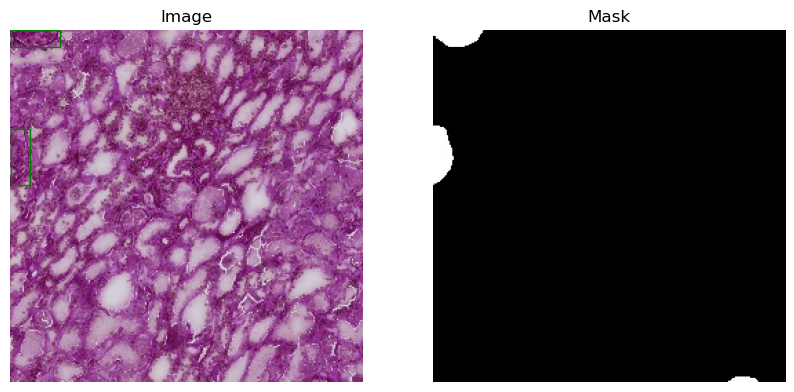

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/cb2d976f4_006_009_image.jpg
[[30.5, 217.5, 21, 29], [122.5, 147.5, 27, 39], [193.5, 133.5, 41, 43], [144.5, 57.0, 33, 42], [106.5, 26.5, 33, 37]]


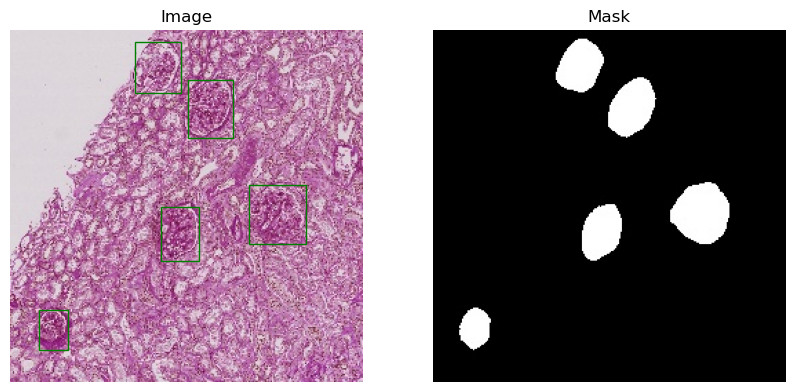

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/0486052bb_003_007_image.jpg
[[157.0, 250.0, 36, 12], [134.5, 228.0, 19, 22], [30.0, 234.5, 44, 37], [178.0, 224.5, 16, 19], [24.0, 196.5, 28, 31], [42.5, 147.0, 39, 36], [224.0, 139.0, 22, 32]]


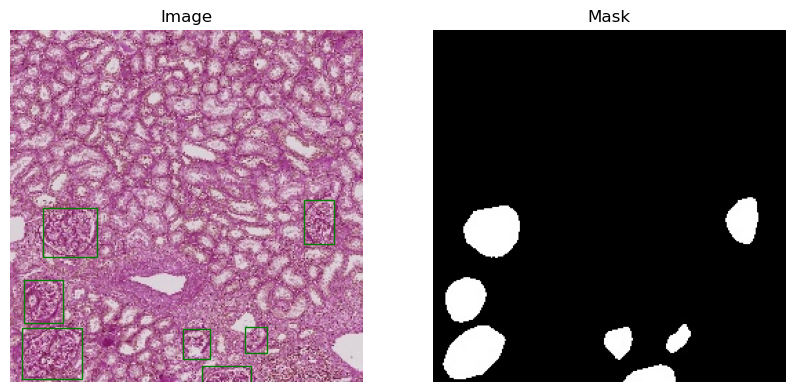

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/1e2425f28_006_005_image.jpg
[[245.0, 246.5, 22, 19]]


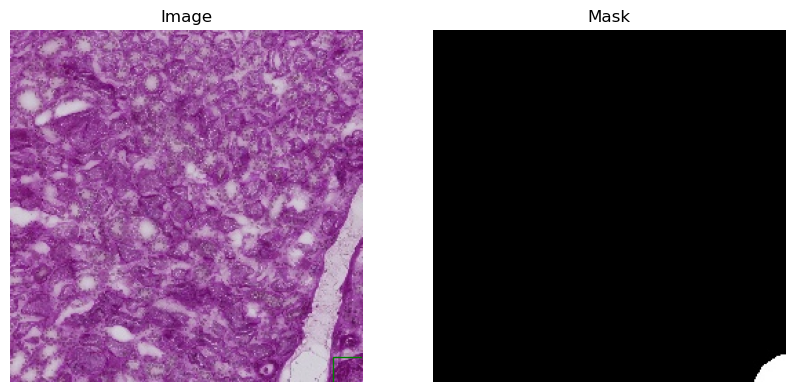

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/b9a3865fc_014_023_image.jpg
[[52.5, 142.5, 29, 35], [32.5, 107.5, 25, 35], [70.5, 92.0, 31, 42], [131.0, 35.5, 36, 35], [14.0, 6.5, 28, 13]]


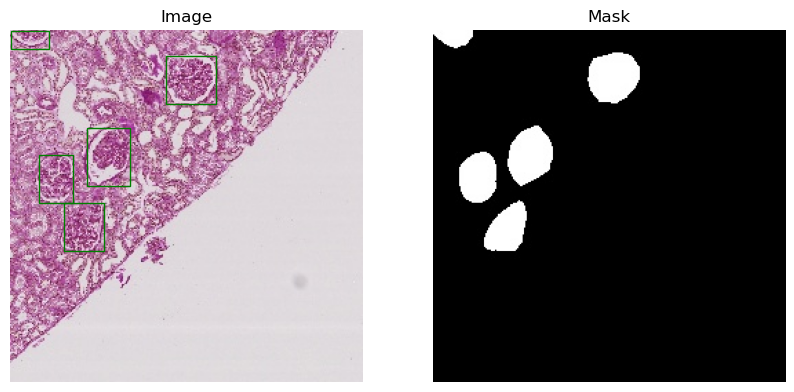

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/095bf7a1f_018_011_image.jpg
[[210.5, 238.0, 53, 36], [100.5, 234.0, 47, 40], [8.5, 63.0, 17, 18], [50.0, 13.5, 58, 27]]


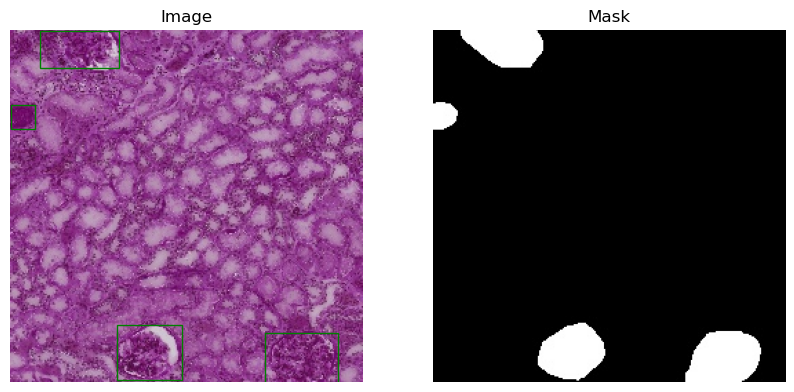

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/095bf7a1f_009_009_image.jpg
[[81.5, 151.0, 59, 54]]


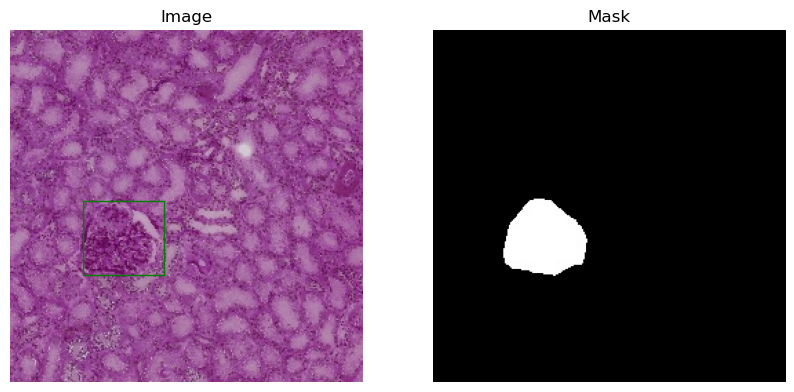

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/afa5e8098_002_014_image.jpg
[[247.0, 223.0, 18, 52], [10.0, 149.5, 20, 33], [224.0, 80.5, 60, 55], [212.0, 5.0, 28, 10]]


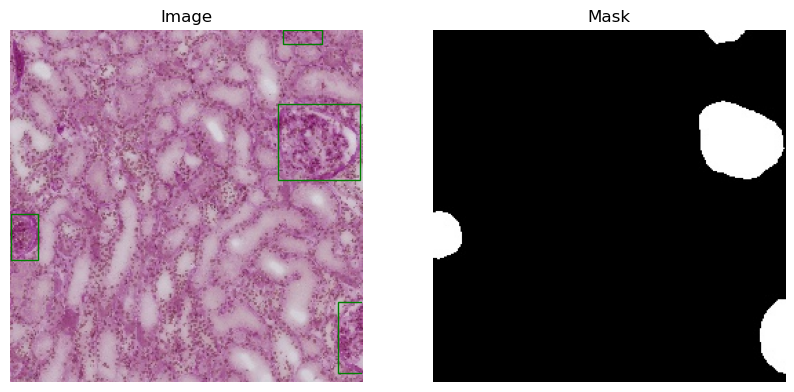

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/4ef6695ce_016_016_image.jpg
[[243.5, 251.5, 25, 9]]


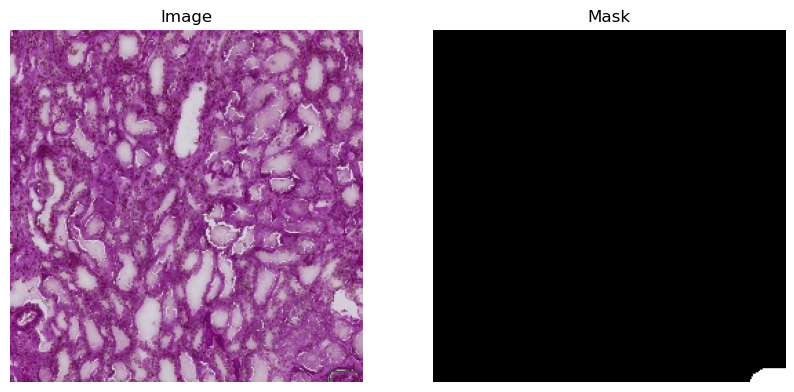

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/afa5e8098_000_025_image.jpg
[[8.0, 248.0, 16, 16], [244.0, 195.0, 24, 48], [23.5, 153.5, 47, 43]]


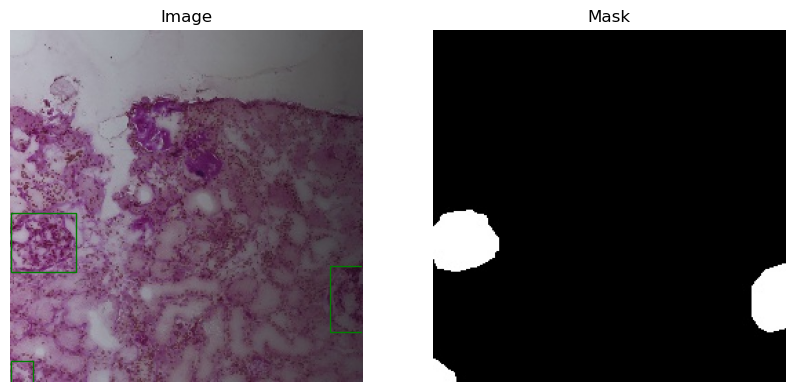

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/8242609fa_010_018_image.jpg
[[238.5, 229.0, 35, 32], [115.5, 225.5, 31, 25], [84.5, 146.5, 41, 37], [193.5, 113.5, 21, 23], [75.0, 16.5, 24, 21]]


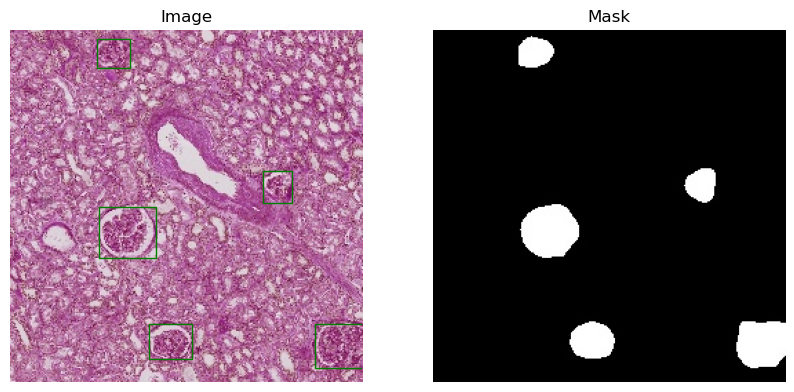

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/095bf7a1f_010_011_image.jpg
[[250.0, 218.5, 12, 33], [172.0, 222.0, 46, 56], [101.5, 181.0, 55, 56], [70.5, 131.0, 55, 60], [197.0, 15.5, 58, 31]]


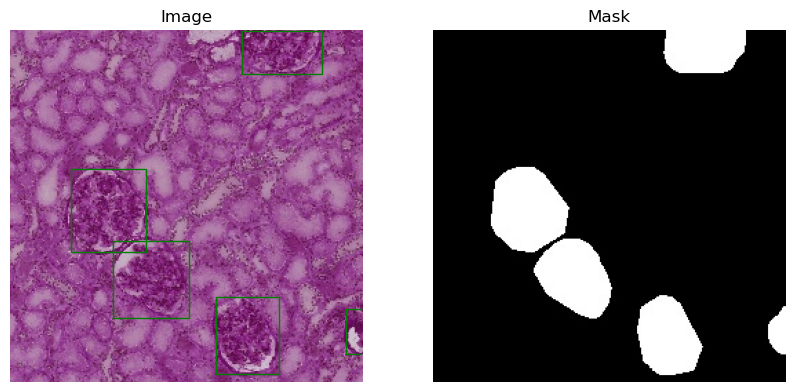

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/1e2425f28_014_019_image.jpg
[[131.0, 121.5, 56, 45], [141.0, 46.0, 56, 50]]


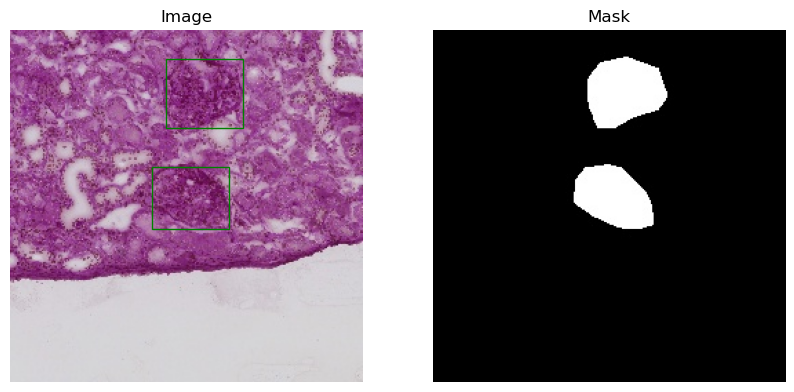

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/4ef6695ce_017_022_image.jpg
[[133.0, 148.5, 40, 37], [246.0, 62.5, 20, 33], [151.0, 15.5, 50, 31]]


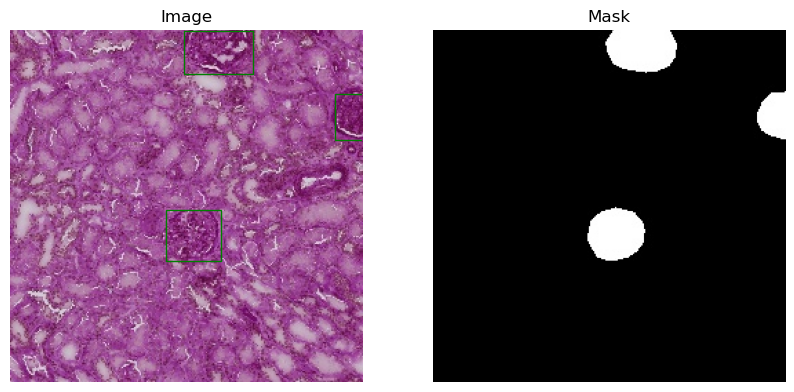

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/2f6ecfcdf_010_012_image.jpg
[[206.0, 212.0, 44, 34], [199.5, 168.5, 25, 19], [166.5, 122.0, 29, 22], [91.5, 71.0, 29, 24], [7.0, 72.5, 14, 27], [159.0, 63.0, 34, 38], [72.0, 51.5, 30, 21], [29.5, 7.0, 33, 14]]


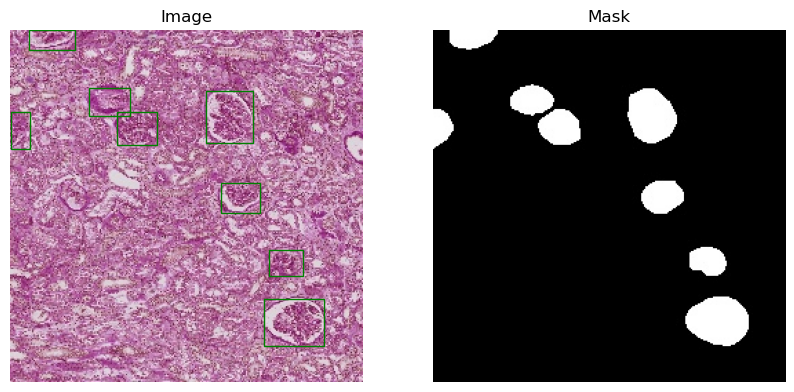

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/26dc41664_007_021_image.jpg
[[167.0, 249.5, 24, 13], [81.0, 208.5, 44, 47], [19.0, 183.5, 30, 29], [56.0, 134.5, 46, 49], [14.0, 93.5, 28, 59], [65.5, 60.0, 43, 46]]


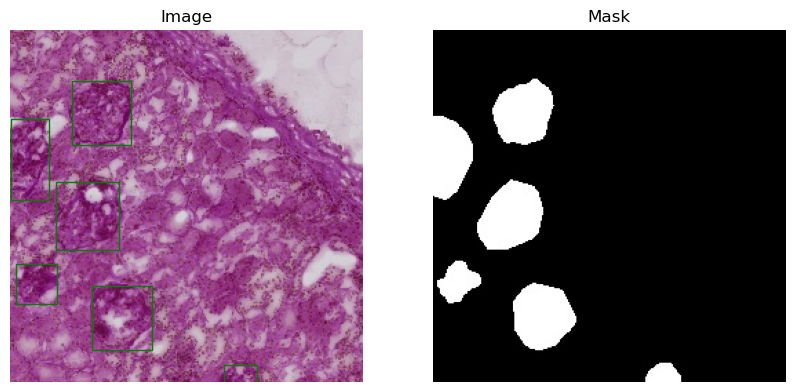

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/c68fe75ea_003_021_image.jpg
[[232.0, 250.5, 44, 11]]


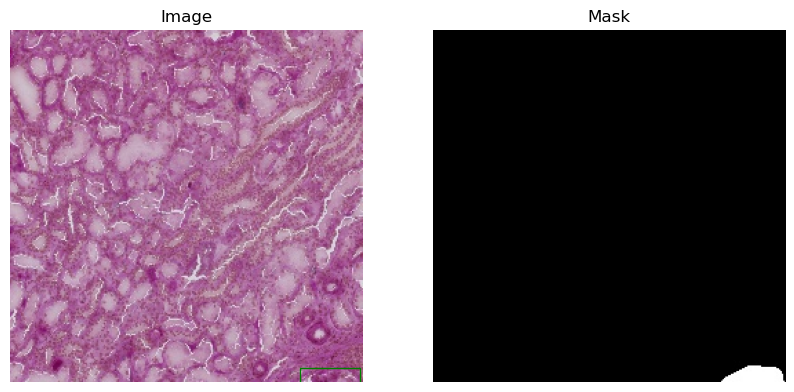

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/aaa6a05cc_005_001_image.jpg
[[210.5, 190.5, 29, 35], [144.5, 184.5, 31, 23], [93.0, 119.5, 32, 27], [48.0, 52.5, 26, 29]]


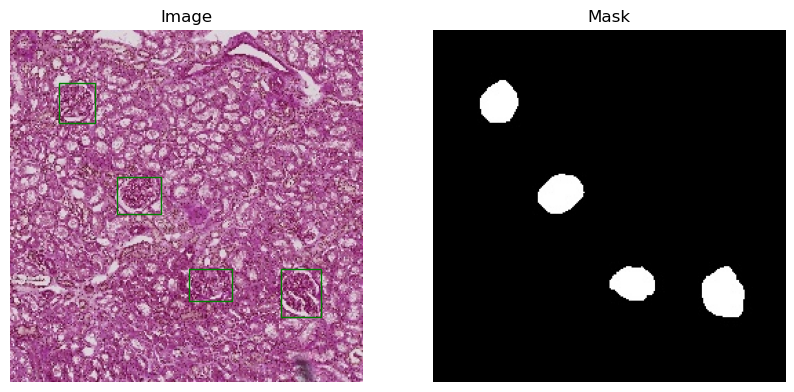

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/26dc41664_004_013_image.jpg
[[208.0, 191.5, 38, 43], [143.0, 172.0, 46, 58], [21.5, 36.5, 39, 43]]


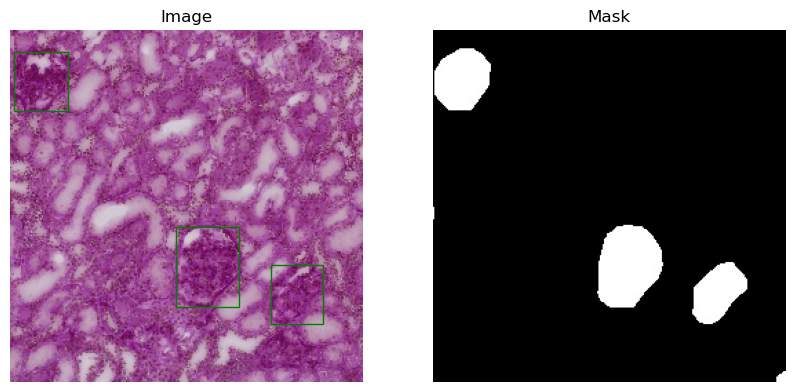

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/cb2d976f4_013_021_image.jpg
[[90.5, 237.5, 37, 31], [53.5, 132.0, 39, 36], [189.5, 75.0, 51, 42]]


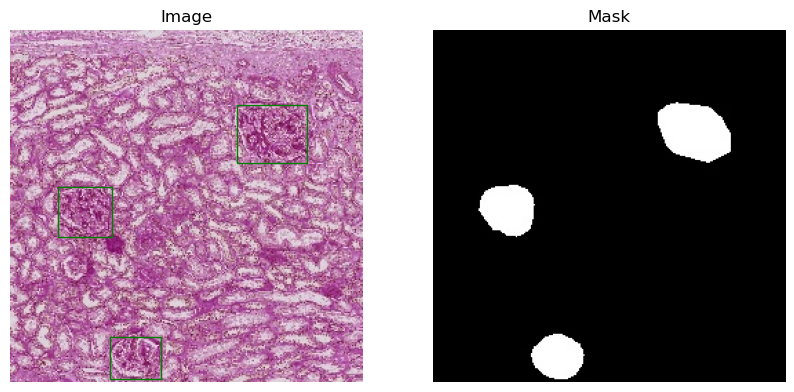

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/afa5e8098_006_011_image.jpg
[[3.5, 175.5, 7, 31], [181.0, 165.0, 60, 56], [52.5, 148.5, 53, 65], [149.5, 12.5, 47, 25]]


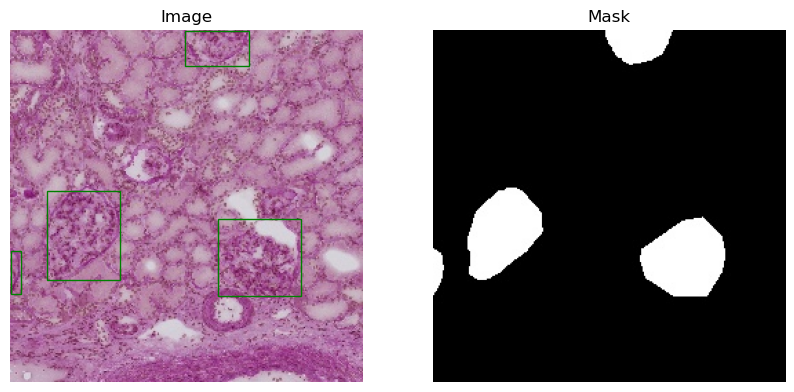

Image name: /home/humanoid/datasets/Hubmap-kidney/train_patch_image/b9a3865fc_013_019_image.jpg
[[5.0, 170.0, 10, 20], [65.0, 170.5, 34, 31], [5.5, 79.0, 11, 22], [136.5, 80.0, 29, 28], [64.5, 36.0, 31, 34]]


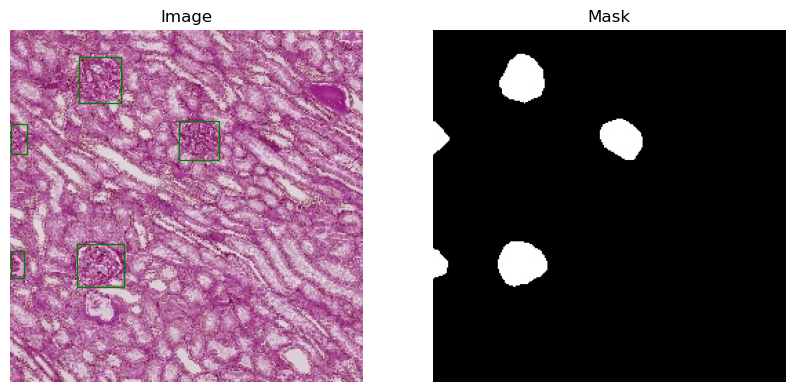

In [9]:
counter = 0
# np.random.seed(42)
FILTER = False
samples = df.sample(100)

def is_bounding_box_on_border(x_center, y_center, width, height, image_width=1024, image_height=1024):
    half_width = width / 2
    half_height = height / 2

    if x_center <= half_width or x_center >= image_width - half_width:
        if y_center <= half_height or y_center >= image_height - half_height:
            return "On the border"
    
    return "Not on the border"


for i, image_name in enumerate(samples["Image Path"].values):
    boxes = eval(samples.iloc[i]["bbox_coord"])
    
    if len(boxes) > 0:
        print("Image name:", image_name)
        image = cv2.imread(image_name)
        mask = cv2.imread(image_name.replace("images","masks").replace("_image","_mask"))
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax1.set_title('Image')
        ax1.axis('off')
        
        ax2.imshow(mask)
        ax2.set_title('Mask')
        ax2.axis('off')
        
        print(boxes)
        corner = False
        for bbox in boxes:
            center_x, center_y, width, height = bbox
            c = 'g'
            if FILTER:
                if((center_x-width//2)<=10 or (center_x-width//2)+width>=1023) or ((center_y-height//2)<=10 or (center_y-height//2)+height>=1023):
                    print("on boarder")
                    c = 'red'
                    corner = True
                
                if corner != True or width*height>1000:
                    x = center_x - width // 2
                    y = center_y - height // 2
                    rect = plt.Rectangle((x, y), width, height, fill=False, edgecolor=c)
                    ax1.add_patch(rect)
                    corner=False
            else:
                x = center_x - width // 2
                y = center_y - height // 2
                rect = plt.Rectangle((x, y), width, height, fill=False, edgecolor=c)
                ax1.add_patch(rect)

        plt.show()
        
        if counter > 20:
            break
        
        counter += 1


In [ ]:
len(df)

0
[]
4


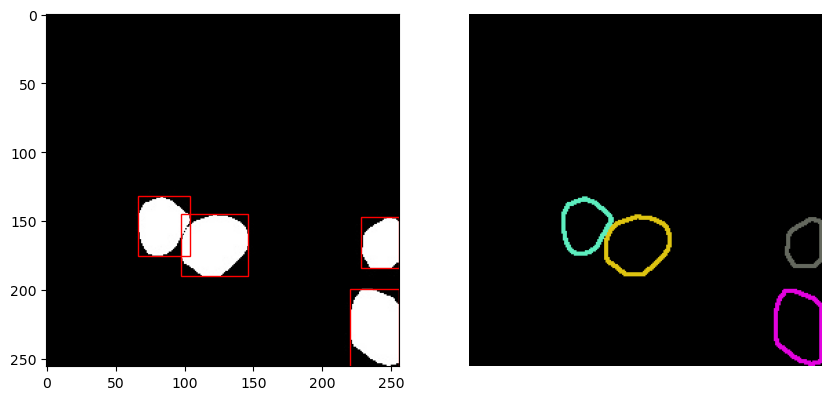

In [36]:
import cv2
import matplotlib.pyplot as plt
import random as rng
import numpy as np

# Read the segmentation mask


def thresh_callback(val):
    threshold = val
    #canny_out = cv2.Canny(mask_blur,threshold,threshold*2)

    #3.Thresholds
    imgSplit = cv2.split(mask_blur)
    flag,b = cv2.threshold(imgSplit[2],0,255,cv2.THRESH_OTSU) 
    #4.Erodes the Thresholded Image
    element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
    canny_out = cv2.erode(b,element)
    contours, hierarchy = cv2.findContours(canny_out, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    drawing = np.zeros((canny_out.shape[0],canny_out.shape[1],3),dtype = np.uint8)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(cv2.cvtColor(mask_blur, cv2.COLOR_BGR2RGB))
    bounding_boxes = []
    for i in range(len(contours)):
        color = (rng.randint(0,255),rng.randint(0,255),rng.randint(0,255))
        cv2.drawContours(drawing,contours,i,color,2,cv2.LINE_8,hierarchy,0)
        x, y, w, h = cv2.boundingRect(contours[i])
        # if(x<=10 or x+w>=1023) or (y<=10 or y+h>=1023):
        #     boarder = True
            # bounding_boxes.append((x + w/2, y + h/2, w, h))
            # x = x - w // 2
            # y = y - h // 2
        bounding_boxes.append((x-2,y-2,w+2,h+2))
    contained_boxes = []
    for bounding_box in bounding_boxes:
        for another_box in bounding_boxes:
            if another_box!=bounding_box:
                if(bounding_box[0]>=another_box[0]) and bounding_box[0]+bounding_box[2]<= another_box[0]+another_box[2] and (bounding_box[1]>=another_box[1]) and bounding_box[1]+bounding_box[3]<= another_box[1]+another_box[3]:
                    print("contained")
                    contained_boxes.append(bounding_box)
    print(len(contained_boxes))
    print(contained_boxes)
    refined_boxes = [box for box in bounding_boxes if box not in contained_boxes]
    print(len(refined_boxes))
    for b in refined_boxes:
        x,y,w,h = b
        rect = plt.Rectangle((x, y), w, h, fill=False, edgecolor="red")
        ax1.add_patch(rect)
    plt.imshow(drawing)


mask = cv2.imread('/home/humanoid/datasets/Hubmap-kidney/train_patch_mask/e79de561c_003_004_mask.jpg')  # Read as grayscale
mask_blur  = mask
max_thresh = 255
threshold = 100
thresh_callback(threshold)

# Generate contours from the mask
# contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Create a blank image for drawing contours
# contour_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# # Draw contours on the image
# cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# # Display the image with contours using Matplotlib
# plt.imshow(contour_image)
plt.axis('off')
plt.show()


In [15]:
mask

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255, 255, 254],
       [  0,   0,   0, ..., 254,   0,   2],
       [  0,   0,   0, ...,   0,   1,   0]], dtype=uint8)

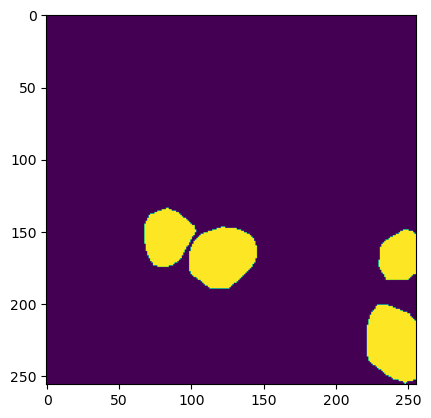

In [30]:
import cv2, numpy as np

#1.Reads Image
objectImage = cv2.imread('/home/humanoid/datasets/Hubmap-kidney/train_patch_mask/e79de561c_003_004_mask.jpg')

#2.Converts to Gray level
cvtcolorImage = cv2.cvtColor(objectImage,cv2.COLOR_RGB2GRAY)

#3.Thresholds
imgSplit = cv2.split(objectImage)
flag,b = cv2.threshold(imgSplit[2],0,255,cv2.THRESH_OTSU) 
#4.Erodes the Thresholded Image
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
b = cv2.erode(b,element)
plt.imshow(b)

In [29]:
b

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [ ]:
def mask_to_boxes(mask):
    """ Convert a boolean (Height x Width) mask into a (N x 4) array of NON-OVERLAPPING bounding boxes
    surrounding "islands of truth" in the mask.  Boxes indicate the (Left, Top, Right, Bottom) bounds
    of each island, with Right and Bottom being NON-INCLUSIVE (ie they point to the indices AFTER the island).

    This algorithm (Downright Boxing) does not necessarily put separate connected components into
    separate boxes.

    You can "cut out" the island-masks with
        boxes = mask_to_boxes(mask)
        island_masks = [mask[t:b, l:r] for l, t, r, b in boxes]
    """
    max_ix = max(s+1 for s in mask.shape)   # Use this to represent background
    # These arrays will be used to carry the "box start" indices down and to the right.
    x_ixs = np.full(mask.shape, fill_value=max_ix)
    y_ixs = np.full(mask.shape, fill_value=max_ix)

    # Propagate the earliest x-index in each segment to the bottom-right corner of the segment
    for i in range(mask.shape[0]):
        x_fill_ix = max_ix
        for j in range(mask.shape[1]):
            above_cell_ix = x_ixs[i-1, j] if i>0 else max_ix
            still_active = mask[i, j] or ((x_fill_ix != max_ix) and (above_cell_ix != max_ix))
            x_fill_ix = min(x_fill_ix, j, above_cell_ix) if still_active else max_ix
            x_ixs[i, j] = x_fill_ix

    # Propagate the earliest y-index in each segment to the bottom-right corner of the segment
    for j in range(mask.shape[1]):
        y_fill_ix = max_ix
        for i in range(mask.shape[0]):
            left_cell_ix = y_ixs[i, j-1] if j>0 else max_ix
            still_active = mask[i, j] or ((y_fill_ix != max_ix) and (left_cell_ix != max_ix))
            y_fill_ix = min(y_fill_ix, i, left_cell_ix) if still_active else max_ix
            y_ixs[i, j] = y_fill_ix

    # Find the bottom-right corners of each segment
    new_xstops = np.diff((x_ixs != max_ix).astype(np.int32), axis=1, append=False)==-1
    new_ystops = np.diff((y_ixs != max_ix).astype(np.int32), axis=0, append=False)==-1
    corner_mask = new_xstops & new_ystops
    y_stops, x_stops = np.array(np.nonzero(corner_mask))

    # Extract the boxes, getting the top-right corners from the index arrays
    x_starts = x_ixs[y_stops, x_stops]
    y_starts = y_ixs[y_stops, x_stops]
    ltrb_boxes = np.hstack([x_starts[:, None], y_starts[:, None], x_stops[:, None]+1, y_stops[:, None]+1])
    return ltrb_boxes

mask = cv2.imread('/home/humanoid/datasets/Hubmap-kidney/train_patch_mask/2f6ecfcdf_003_008_mask.jpg', 0)
mask[mask>0.0]=1
boxes = mask_to_boxes(mask)

In [ ]:
fig,axs = plt.subplots(figsize=(5,5))
# print((min_x,min_y,max_x,max_y))
for box in boxes:
    axs.imshow(mask)
    # if max_x>2048:
    #     max_x = 2048
    # if max_y>2048:
    #     max_y = 2048
    min_x,min_y,max_x,max_y = box
    rect = patches.Rectangle((min_x,min_y),max_x-min_x,max_y-min_y,edgecolor='red',fill=False)

    axs.add_patch(rect)

In [ ]:
from torchvision.ops import masks_to_boxes
import torchvision.transforms as transforms
transform = transforms.Compose([
    transforms.ToTensor(),
])
mask_ = transform(mask)
draw_boxes = masks_to_boxes(mask_)

In [ ]:
draw_boxes

In [ ]:
import json 
import matplotlib.patches as patches
import numpy as np
from matplotlib import pyplot as plt
json_filename = "/home/humanoid/datasets/Hubmap-kidney/train/2f6ecfcdf.json"
#/home/humanoid/datasets/Hubmap-kidney/train_patch_mask/4ef6695ce_039_009_mask.jpg

read_file = open(json_filename, "r") 
data = json.load(read_file)
def normalize(x):
    min_value = np.min(x)
    max_value = np.max(x)
    normalized = (x-min_value)/(max_value-min_value)
    normalized = normalized * 2048
    return normalized
# polys = []
def check_polygon(geom):
    min_x = np.min(geom[:,:,0]).astype(np.int32)
    min_y = np.min(geom[:,:,1]).astype(np.int32)
    max_x = np.max(geom[:,:,0]).astype(np.int32)
    max_y = np.max(geom[:,:,1]).astype(np.int32)
    return min_x,min_y,max_x,max_y

fig,axs = plt.subplots(figsize=(5,5))

for index in range(data.__len__()):
    geom = np.array(data[index]['geometry']['coordinates'])
    rangex = (int(4*2048)+2048,int(5*2048)+2048)
    rangey= (int(5*2048)+2048,int(6*2048)+2048)
    min_x,min_y,max_x,max_y = check_polygon(geom)
    if min_x> rangex[0] and max_x<rangex[1]:
        print("x is inside")
    if min_y> rangey[0] and max_y<rangey[1]:
        print("y is indide")
        
        axs.imshow(np.zeros((2048,2048)))
        geom = normalize(geom)
        poly = patches.Polygon(geom[0],edgecolor="red",facecolor=None)
        axs.add_patch(poly)
plt.show()

    # min_x = np.min(geom[:,:,0]).astype(np.int32)
    # min_y = np.min(geom[:,:,1]).astype(np.int32)
    # max_x = np.max(geom[:,:,0]).astype(np.int32)
    # max_y = np.max(geom[:,:,1]).astype(np.int32)
    # boxes = []
    # print((min_x,min_y,max_x,max_y))
    # if min_x in range(rangex[0],rangex[1]) and (min_y in range(rangey[0],rangey[1])):
    #     fig,axs = plt.subplots(figsize=(5,5))
    #     # print((min_x,min_y,max_x,max_y))
    #     min_x,min_y,max_x,max_y = min_x-rangex[0],min_y-rangey[0],max_x-rangex[0],max_y-rangey[0]
    #     axs.imshow(np.zeros((2048,2048)))
    #     print("box inside")
    #     # if max_x>2048:
    #     #     max_x = 2048
    #     # if max_y>2048:
    #     #     max_y = 2048
    #     print((min_x,min_y,max_x,max_y))
    #     geom = normalize(geom)
    #     poly = patches.Polygon(geom[0],edgecolor="red",facecolor=None)
    #     rect = patches.Rectangle((min_x,min_y),max_x-min_x,max_y-min_y,edgecolor='red')
        
    #     axs.add_patch(poly)
    #     axs.add_patch(rect)
    #     plt.show()
    #     break

In [ ]:
if 1 in range(0,5):
    print("true")

In [ ]:
geom

In [ ]:
rangex

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the segmentation mask
mask = cv2.imread('/home/humanoid/internalHD/datasets/kidney_patch/train/masks/2f6ecfcdf_012_035_mask.jpg', 0)  # Read as grayscale

# Threshold the mask to obtain a binary image
ret, thresh = cv2.threshold(mask, 15, 255, cv2.THRESH_BINARY)

# Perform connected components labeling
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh)

# Create a blank image for drawing bounding boxes
bbox_image = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Draw bounding boxes for each connected component
for label in range(1, num_labels):
    # Create a mask for the current label
    label_mask = (labels == label).astype('uint8') * 255

    # Generate contours from the label mask
    contours, hierarchy = cv2.findContours(label_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate the bounding rectangle for each contour
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # Draw the bounding box on the image
        cv2.rectangle(bbox_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes using Matplotlib
plt.imshow(bbox_image)
plt.axis('off')
plt.show()


In [ ]:
samples[samples=="/home/humanoid/internalHD/datasets/kidney_patch/train/images/b9a3865fc_046_036_image.jpg"].dropna(how='all')

In [ ]:
bbox = samples[samples["Image Path"]=="/home/humanoid/internalHD/datasets/kidney_patch/train/images/b9a3865fc_046_036_image.jpg"]["bbox_coord"].values

In [ ]:
bbox

In [ ]:
df.columns

In [ ]:
df[df["num_patch"]==0].count()

In [ ]:
df[df["num_patch"]==7].count()

In [ ]:
df

In [ ]:
filtered = df[df["num_patch"]!=0]

In [ ]:
filtered[filtered["num_patch"]==0]

In [ ]:
len(filtered)

In [ ]:
filtered.to_csv('filtered_train_kidney.csv', index=False)